# Dr. Simon Schnoll 'Cosmosphysical' Histogram  Tool

This tool implements the data analysis steps taken in [Cosmophysical Factors in Stochastic Processes](http://shnoll.ptep-online.com/publications.html).

Full reference:<br>
Shnoll S. E. Cosmophysical Factors in Stochastic Processes. American Research Press, Rehoboth (NM), 2012


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [9]:
class Shnoll:
    
    def __init__(self):
        self.BINS = 100
        self.HRANGE = 100
        self.WINDOW = 4
        self.NSMOOTH = 10

    #returns random integers
    def get_sample_data(self):
        arr = np.random.randint(0,2**31,self.HRANGE)
        return arr
    
    #takes integer, returns number of binary 1's in the integer
    def hamming_weight(self, n):
        c = 0
        while n:
            c += 1
            n &= n - 1
        return c

    #takes array of integers, returns int32 array of computed hamming weights
    def hamming_weight_array(self, arr):
        a = np.array([],dtype=np.int64)
        for i in arr:
            a = np.append(a,self.hamming_weight(i))
        return a
    
    #takes timeseries data, returns x and y values for a line histogram
    def linehist(self, data):
        y, x = np.histogram(data,bins=self.BINS)
        x = 0.5*(x[1:]+x[:-1])
        return x, y
    
    #takes array of integers, returns array of smoothed values 
    def smooth(self, arr):
        arr = pd.Series(arr)
        for i in range(self.NSMOOTH):
            arr = arr.rolling(self.WINDOW,center=True,min_periods=1).mean()
        return arr
    
    #plot
    def plot(self, x, y):
        f, ax = plt.subplots()
        plt.plot(x,y)
        return plt.show()
    
    #plot n smoothed histograms
    def plot_histograms(self, n):
        for i in range(n):
            a = self.get_sample_data()
            a = self.hamming_weight_array(a)
            x, y = self.linehist(a)
            y = self.smooth(y)
            self.plot(x,y)

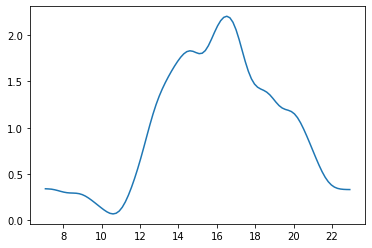

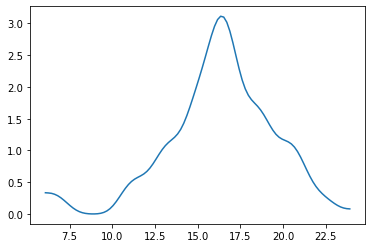

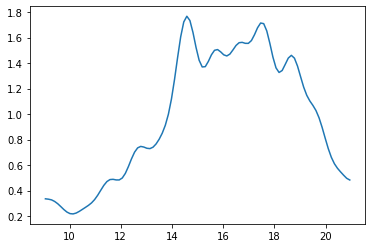

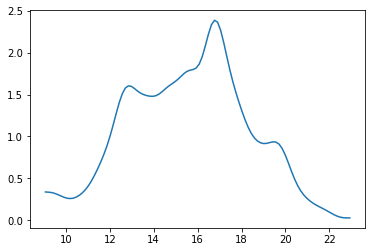

In [13]:
#Create new class instance 
shnoll = Shnoll()

#plot n historgrams
shnoll.plot_histograms(4)